<a href="https://colab.research.google.com/github/JairAlbertoHuertaDiaz45/Simulaci-n-II/blob/main/Linea_espera_1_Servidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20/11/202**

In [1]:
from random import expovariate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
from math import inf as Infinity

In [2]:
tpll = 2
T= 15
N = 0
t = 0
tiempos = [0]
eventos = [0]
while t<=T:
  N=N+1
  t=t+ expovariate(1/tpll)
  tiempos.append(t)
  eventos.append(N)
tiempos = np.array(tiempos)
eventos = np.array(eventos)


print("El nùmero de clientes en el sistema: ",N)

El nùmero de clientes en el sistema:  3


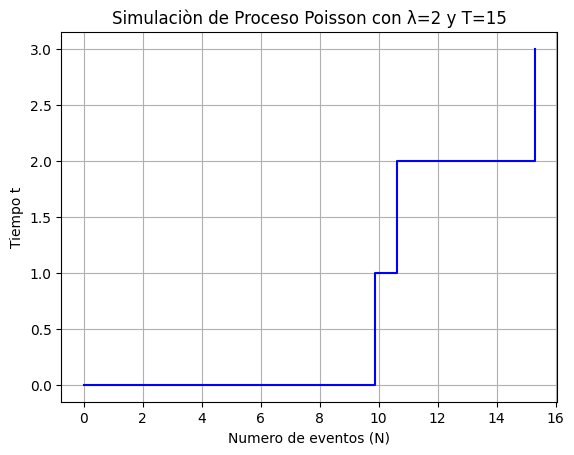

In [3]:
plt.step(tiempos, eventos, where='post', color='b', label="Tiempo de eventos")
plt.xlabel('Numero de eventos (N)')
plt.ylabel('Tiempo t')
plt.title(f"Simulaciòn de Proceso Poisson con λ={tpll} y T={T}")
plt.grid(True)
plt.show()

In [4]:
tpll = 2
tps = 1
T= 100
N = 0
t = 0
T_arrivo = expovariate(1/tpll)
T_salida = Infinity
X=[]
Y=[]
while t<=T:
  tll=expovariate(1/tpll)
  ts=expovariate(1/tps)
  if tll<ts:
    t=t+tll
    N=N+1
    T_arrivo=t
    X.append(t)
    Y.append(N)
  else:
    if N>0:
      N-=1
      t=t+ts
      X.append(t)
      Y.append(N)
X = np.array(X)
Y = np.array(Y)
print("El nùmero de clientes en el sistema: ",N)

El nùmero de clientes en el sistema:  1


**Graficar Y vs X**

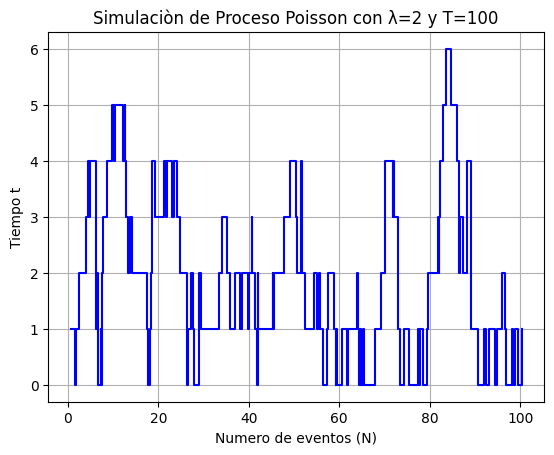

In [5]:
plt.step(X,Y, where='post', color='b', label="Tiempo de eventos")
plt.xlabel('Numero de eventos (N)')
plt.ylabel('Tiempo t')
plt.title(f"Simulaciòn de Proceso Poisson con λ={tpll} y T={T}")
plt.grid(True)
plt.show()

***Cálculo de la Integral***

In [16]:
integrand = np.array(Y[:-1] * np.diff(X)) #Area de cada rectangulo
N_dt = np.sum(integrand) #Sumatoria
L_calculado = N_dt / T
N_dt


np.float64(186.49761173124367)

**El número promedio de clientes en el sistema es:**

In [17]:
L_calculado

np.float64(1.8649761173124366)

Podemos estimar las probabilidades de que haya 1, 2, 3,... clientes en el sistema

In [18]:
duracion = np.diff(X) #Direfencia entre el tiempo de un evento y el anterior
estados = Y[:-1] #Obtenemos el numero de clientes antes del siguiente evento

tiempo_en_estado = {} #Almacenamos el tiempo total para cada estado
clientes_unicos = np.unique(estados) #Obtener los numerod de clientes unicos observados

for k in clientes_unicos:
  #Esta mascara nos ayuda a encontrar toas las duraciones donde el num de clientes es igual a k
  mascara_boleana = (estados == k)

  T_k = np.sum(duracion[mascara_boleana])
  tiempo_en_estado[k] = T_k

  P_k = T_k / T

In [19]:
print(f"| P({k} clientes) = {T_k:.4f} / {T} = {P_k:.4f}")

| P(6 clientes) = 1.0499 / 100 = 0.0105


Ahora vamos a implementar las formulas teóricas de la fila M/M/1

In [20]:
lambda_ = 1 / tpll
mu_ = 1 / tps

rho_ = lambda_ / mu_

if rho_ >= 1:
  print("Error: El sistema es inestable")
else:
  L_teo = lambda_ / (mu_ - lambda_)
  Lq_teo = (lambda_ ** 2) / (mu_ * (mu_ - lambda_))
Lq_teo

0.5

Compraración de resultados

In [14]:
comparacion = abs(L_teo - L_calculado)
comparacion

np.float64(0.8649761173124366)